### Lab 5: Insurance Costs

Elizabeth Berry

GSB 544-01

11/6/23

#### Part One: Data Exploration

In [82]:
# P1.1 Read in data and display some summaries of the data

import pandas as pd
insurance = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
insurance.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [83]:
insurance.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


In [84]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      431 non-null    int64  
 1   sex      431 non-null    object 
 2   bmi      431 non-null    float64
 3   smoker   431 non-null    object 
 4   region   431 non-null    object 
 5   charges  431 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 20.3+ KB


In [85]:
print(insurance['sex'].unique())
print(insurance['smoker'].unique())
print(insurance['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'northwest' 'southeast' 'northeast']


In [86]:
# P1.2 Dummify non-numeric variables
insurance = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'], drop_first=True)
insurance.head()

,age,bmi,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,1,0,0,1
1,33,22.705,21984.47061,1,0,1,0,0
2,32,28.880,3866.85520,1,0,1,0,0
3,31,25.740,3756.62160,0,0,0,1,0
4,60,25.840,28923.13692,0,0,1,0,0


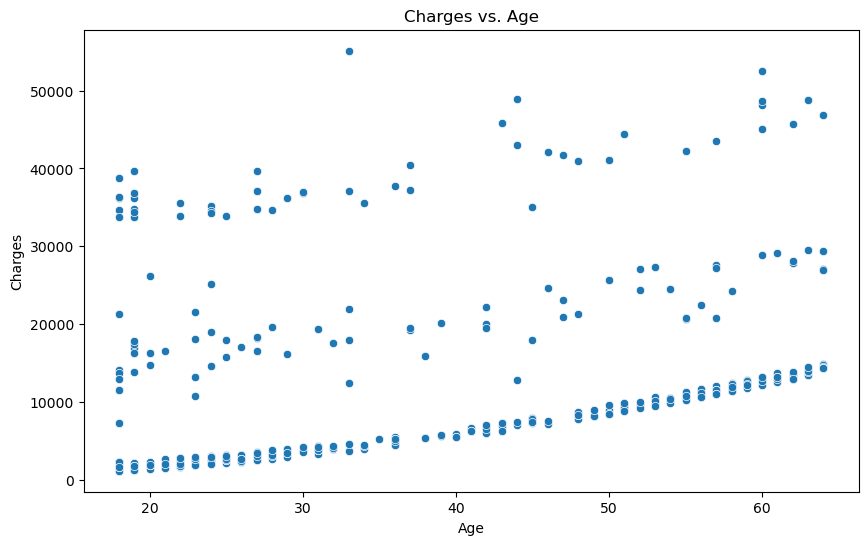

In [87]:
# P1.3 Plots for charges against predictor variables
import matplotlib.pyplot as plt
import seaborn as sns

# Charges vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=insurance)
plt.title("Charges vs. Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

It appears that there are 3 groups of people who are all charged similar amounts depending on what category they fall under, separate from age. At each age, there are 3 groups of charges which increase as the individual gets older. In younger years, individuals may have charges close to 0, while others may have charges betwen $10,000 and $25,000, whereas the last group is charged between $32,000 and $40,000. From this base charge point, the charges increase at similar rates as the person in the same class gets older. 

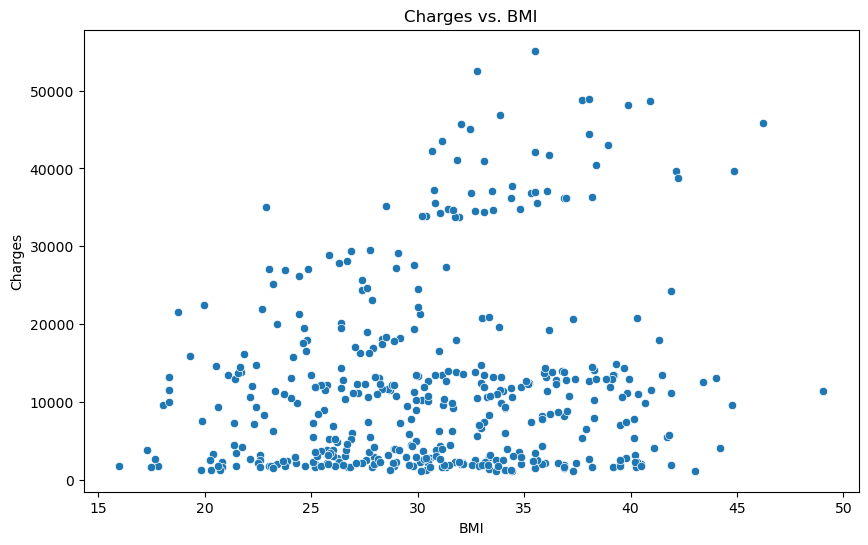

In [88]:
# Charges vs. BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=insurance)
plt.title("Charges vs. BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

People with a higher BMI tend to have increased charges due to the health risks posed by being overweight. The cutoff for obesity is 30, and BMIs higher than 30 show higher charges than individuals with a BMI less than 30.

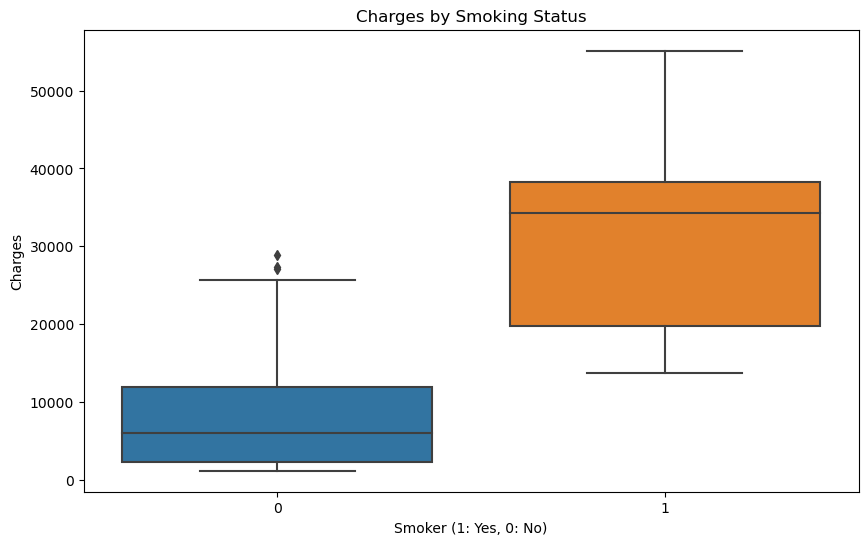

In [89]:
# Charges by Smoker status
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker_yes', y='charges', data=insurance)
plt.title("Charges by Smoking Status")
plt.xlabel("Smoker (1: Yes, 0: No)")
plt.ylabel("Charges")
plt.show()

People who smoke pay much more for health insurance compared to those who do not smoke, approximately $30,000 more.

#### Part Two: Simple Linear Models

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# P2.1 Model 1: Age
X_age = insurance[['age']]
y = insurance['charges']

model1 = LinearRegression()
model1.fit(X_age, y)

y_pred1 = model1.predict(X_age)

mse1 = mean_squared_error(y, y_pred1)
r2_1 = r2_score(y, y_pred1)
print(f"Mean Squared Error (MSE) for Model 1: {mse1}. R-squared for Model 1: {r2_1}")

Mean Squared Error (MSE) for Model 1: 126739267.9102639. R-squared for Model 1: 0.09938105452062695


In [91]:
# P2.2 Model 2: Age and sex
X_age_sex = insurance[['age', 'sex_male']]

model2 = LinearRegression()
model2.fit(X_age_sex, y)

y_pred2 = model2.predict(X_age_sex)

mse2 = mean_squared_error(y, y_pred2)
r2_2 = r2_score(y, y_pred2)
print(f"Mean Squared Error (MSE) for Model 2: {mse2}. R-squared for Model 2: {r2_2}")

Mean Squared Error (MSE) for Model 2: 126633939.67937085. R-squared for Model 2: 0.10012952499706418


In [92]:
# P2.3 Model 3: Age and smoker status
X_age_smoker = insurance[['age', 'smoker_yes']]

model3 = LinearRegression()
model3.fit(X_age_smoker, y)

y_pred3 = model3.predict(X_age_smoker)

mse3 = mean_squared_error(y, y_pred3)
r2_3 = r2_score(y, y_pred3)
print(f"Mean Squared Error (MSE) for Model 3: {mse3}. R-squared for Model 3: {r2_3}")

Mean Squared Error (MSE) for Model 3: 33719831.46524372. R-squared for Model 3: 0.7603842948069405


P2.4: Model 3 fits the data best with the highest R-squared value of .76 compared to .099 and .1 for models 1 and 2. The MSE is also lowest for Model 3.

#### Part Three: Multiple Linear Models

In [93]:
# P3.1 Model 4: Age and BMI
X_age_bmi = insurance[['age', 'bmi']]

model4 = LinearRegression()
model4.fit(X_age_bmi, y)

y_pred4 = model4.predict(X_age_bmi)

mse4 = mean_squared_error(y, y_pred4)
r2_4 = r2_score(y, y_pred4)

print(f"Mean Squared Error (MSE) for Model 4: {mse4}. R-squared for Model 4: {r2_4}")

Mean Squared Error (MSE) for Model 4: 123792439.58129103. R-squared for Model 4: 0.12032144234129338


Model 4 (with age and BMI as predictors) fits the data better than Model 1 (with just age as the predictor) as Model 4 has a lower MSE and higher R-squared compared to Model 1. Overall, both Models 1 and 4 are not the best fit for the data. 

In [94]:
# P3.2 Model 5: Age and age^2
X_age_age2 = pd.DataFrame({'age': insurance['age'], 'age^2': insurance['age'] ** 2})

model5 = LinearRegression()
model5.fit(X_age_age2, y)

y_pred5 = model5.predict(X_age_age2)

mse5 = mean_squared_error(y, y_pred5)
r2_5 = r2_score(y, y_pred5)

print(f"Mean Squared Error (MSE) for Model 5: {mse5}. R-squared for Model 5: {r2_5}")

Mean Squared Error (MSE) for Model 5: 126710293.80956802. R-squared for Model 5: 0.09958694669946933


Model 5 (with age and age^2 as predictors) fits the data better than Model 1 (with just age as the predictor) as Model 5 has a slightly lower MSE and very slightly higher R-squared compared to Model 1. Overall, both Models 1 and 5 are not the best fit for the data. 

In [95]:
from sklearn.preprocessing import PolynomialFeatures

# P3.3 Model 6: Polynomial model of degree 4
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly4 = poly.fit_transform(insurance[['age']])

model6 = LinearRegression()
model6.fit(X_poly4, y)

y_pred6 = model6.predict(X_poly4)

mse6 = mean_squared_error(y, y_pred6)
r2_6 = r2_score(y, y_pred6)

print(f"Mean Squared Error (MSE) for Model 6: {mse6}. R-squared for Model 6: {r2_6}")

Mean Squared Error (MSE) for Model 6: 125550389.6456982. R-squared for Model 6: 0.1078293145318383


Model 6 fits the data better than Model 1 as Model 6 has a slightly lower MSE and very slightly higher R-squared compared to Model 1. Overall, both Models 1 and 6 are not the best fit for the data.

In [96]:
# P3.4 Model 7: Polynomial model of degree 12
poly = PolynomialFeatures(degree=12, include_bias=False)
X_poly12 = poly.fit_transform(insurance[['age']])

model7 = LinearRegression()
model7.fit(X_poly12, y)

y_pred7 = model7.predict(X_poly12)

mse7 = mean_squared_error(y, y_pred7)
r2_7 = r2_score(y, y_pred7)

print(f"Mean Squared Error (MSE) for Model 7: {mse7}. R-squared for Model 7: {r2_7}")

Mean Squared Error (MSE) for Model 7: 125576221.27331766. R-squared for Model 7: 0.10764575300737766


Model 7 fits the data better than Model 1 as Model 7 has a slightly lower MSE and very slightly higher R-squared compared to Model 1. Overall, both Models 1 and 7 are not the best fit for the data. 

P3.5: Based on the MSE and R-squared values alone from all models, Model 3 is the best fit for the data with an R-squared of .76 and MSE of 33719831. Of the multiple linear models, Model 6 is the best fit with MSE of 125550390 and R-squared of .1078. I don't think it is the "best" model overall because we would still need to test whether the model is overfitting the data, and how it would perform on the test dataset. 

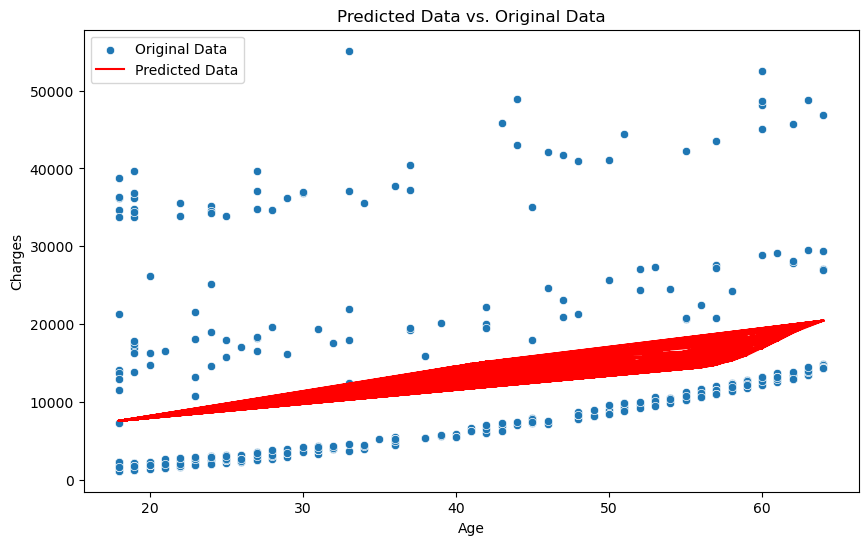

In [107]:
# P3.6 Plot predictions from model 7
import numpy as np

X_poly12_df = pd.DataFrame(X_poly12, columns=poly.get_feature_names_out(['age']))
age_values = X_poly12_df['age']
y_pred12_values = model7.predict(X_poly12)

pred_df = pd.DataFrame({'age': age_values, 'charges': y_pred12_values})

# Original data plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=insurance, label="Original Data")

# Plot predictions for Model 7
plt.plot(pred_df['age'], pred_df['charges'], color='red', label="Predicted Data")
plt.title("Predicted Data vs. Original Data")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

#### Part Four: New Data

In [37]:
insurance2 = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")

insurance2 = pd.get_dummies(insurance2, columns=['sex', 'smoker', 'region'], drop_first=True)

insurance2.head()

,age,bmi,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,23,34.400,1826.84300,1,0,0,0,1
1,56,40.300,10602.38500,1,0,0,0,1
2,18,34.100,1137.01100,1,0,0,1,0
3,63,23.085,14451.83515,0,0,0,0,0
4,63,28.310,13770.09790,1,0,1,0,0


In [129]:
X_original = insurance[['age', 'bmi', 'smoker_yes', 'sex_male', 'region_northwest', 'region_southwest','region_southeast']].copy()
y_original = insurance['charges']

# Add interaction terms for age * smoker_yes and bmi * smoker_yes to train X_original
X_original['age_smoker_interaction'] = X_original['age'] * X_original['smoker_yes']
X_original['bmi_smoker_interaction'] = X_original['bmi'] * X_original['smoker_yes']
X_original['age_bmi_interaction'] = X_original['bmi'] * X_original['age']


X_new = insurance2[['age', 'bmi', 'smoker_yes', 'sex_male', 'region_northwest', 'region_southwest','region_southeast']].copy()

# Add interaction terms for age * smoker_yes and bmi * smoker_yes to test set
X_new['age_smoker_interaction'] = X_new['age'] * X_new['smoker_yes']
X_new['bmi_smoker_interaction'] = X_new['bmi'] * X_new['smoker_yes']
X_new['age_bmi_interaction'] = X_new['age'] * X_new['bmi']

In [120]:
# Model 1: Age only
model1_2 = LinearRegression()
model1_2.fit(X_original[['age']], y_original)
y_pred_model1_2 = model1_2.predict(X_new[['age']])
mse_model1_2 = mean_squared_error(insurance2['charges'], y_pred_model1_2)
print(f"Mean Squared Error (MSE) for Model 1.2: {mse_model1_2}")

Mean Squared Error (MSE) for Model 1.2: 136077136.50195494


In [121]:
# Model 2: Age and BMI
model2_2 = LinearRegression()
model2_2.fit(X_original[['age', 'bmi']], y_original)
y_pred_model2_2 = model2_2.predict(X_new[['age', 'bmi']])
mse_model2_2 = mean_squared_error(insurance2['charges'], y_pred_model2_2)
print(f"Mean Squared Error (MSE) for Model 2.2: {mse_model2_2}")

Mean Squared Error (MSE) for Model 2.2: 132636406.11081287


In [122]:
# Model 3: Age, BMI, and Smoker as predictors (no interaction terms)
model3_2 = LinearRegression()
model3_2.fit(X_original[['age', 'bmi', 'smoker_yes']], y_original)
y_pred_model3_2 = model3_2.predict(X_new[['age', 'bmi', 'smoker_yes']])
mse_model3_2 = mean_squared_error(insurance2['charges'], y_pred_model3_2)
print(f"Mean Squared Error (MSE) for Model 3.2: {mse_model3_2}")

Mean Squared Error (MSE) for Model 3.2: 35377541.2414163


In [123]:
# Model 4: Age and BMI with interaction term with Smoker
model4_2 = LinearRegression()
model4_2.fit(X_original[['age', 'bmi', 'age_smoker_interaction', 'bmi_smoker_interaction']], y_original)
y_pred_model4_2 = model4_2.predict(X_new[['age', 'bmi', 'age_smoker_interaction', 'bmi_smoker_interaction']])
mse_model4_2 = mean_squared_error(insurance2['charges'], y_pred_model4_2)
print(f"Mean Squared Error (MSE) for Model 4.2: {mse_model4_2}")

Mean Squared Error (MSE) for Model 4.2: 24795908.41264334


In [144]:
# Model 5: Age, BMI, Smoker, and interaction terms with Smoker
model5_2 = LinearRegression()
model5_2.fit(X_original[['age', 'bmi', 'smoker_yes','age_smoker_interaction', 'bmi_smoker_interaction']], y_original)
y_pred_model5_2 = model5_2.predict(X_new[['age', 'bmi', 'smoker_yes', 'age_smoker_interaction', 'bmi_smoker_interaction']])
mse_model5_2 = mean_squared_error(insurance2['charges'], y_pred_model5_2)
print(f"Mean Squared Error (MSE) for Model 5.2: {mse_model5_2}")
# Model 5 is the best to use as it has the lowest MSE compared to other models.

Mean Squared Error (MSE) for Model 5.2: 21786256.86685248


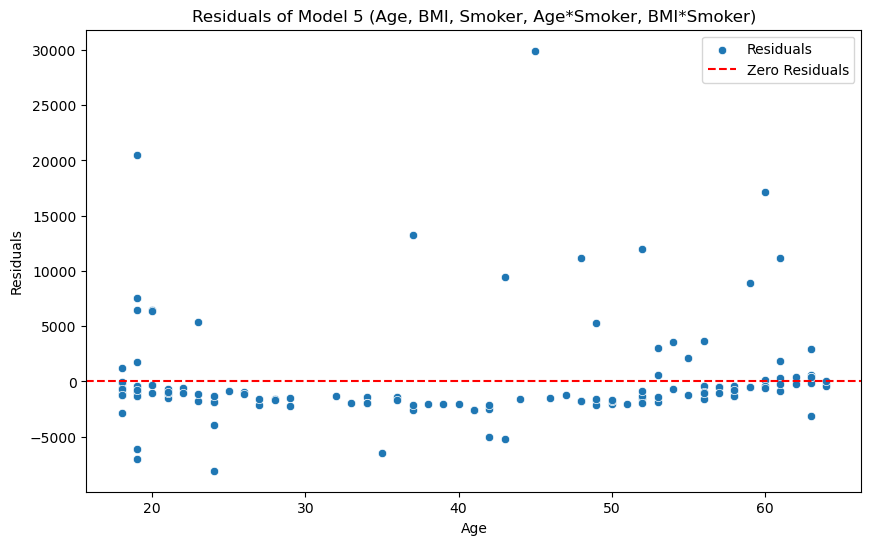

In [125]:
residuals_model5 = insurance2['charges'] - y_pred_model5_2

plt.figure(figsize=(10, 6))
sns.scatterplot(x=insurance2['age'], y=residuals_model5, label="Residuals")
plt.axhline(y=0, color='red', linestyle='--', label="Zero Residuals")
plt.title("Residuals of Model 5 (Age, BMI, Smoker, Age*Smoker, BMI*Smoker)")
plt.xlabel("Age")
plt.ylabel("Residuals")
plt.legend()
plt.show()

#### Part Five: Full Exploration

In [149]:
# Best Model: Age, BMI, Sex, Smoker, and interaction terms with Smoker
model6_2 = LinearRegression()
model6_2.fit(X_original[['age', 'bmi', 'smoker_yes', 'age_bmi_interaction', 'bmi_smoker_interaction']], y_original)
y_pred_model6_2 = model6_2.predict(X_new[['age', 'bmi', 'smoker_yes', 'age_bmi_interaction', 'bmi_smoker_interaction']])
mse_model6_2 = mean_squared_error(insurance2['charges'], y_pred_model6_2)
print(f"Mean Squared Error (MSE) for Model 6.2: {mse_model6_2}")

Mean Squared Error (MSE) for Model 6.2: 21752827.042981613


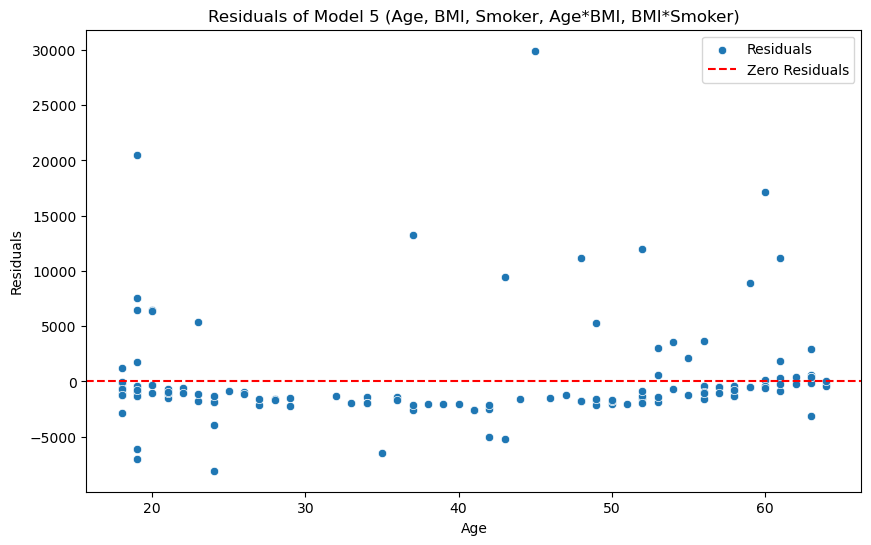

In [139]:
residuals_model5 = insurance2['charges'] - y_pred_model5_2

plt.figure(figsize=(10, 6))
sns.scatterplot(x=insurance2['age'], y=residuals_model5, label="Residuals")
plt.axhline(y=0, color='red', linestyle='--', label="Zero Residuals")
plt.title("Residuals of Model 5 (Age, BMI, Smoker, Age*BMI, BMI*Smoker)")
plt.xlabel("Age")
plt.ylabel("Residuals")
plt.legend()
plt.show()